<a href="https://colab.research.google.com/github/Apoorva-Khare/ML_Models_Implementation/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting Algorithm

Gradient boosting is a machine learning technique that builds strong predictive models by combining multiple weaker models, typically decision trees. It works by sequentially training these weak models, with each one focusing on correcting the errors of its predecessors. The algorithm minimizes a loss function (like mean squared error for regression) by iteratively adjusting the model parameters using gradient descent.

In [ ]:
# Importing libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Create and train the Gradient Boosting model
model = GradientBoostingClassifier(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.1,    # Step size shrinkage
    max_depth=3,          # Max depth of each tree
    random_state=42
)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 2 69]]


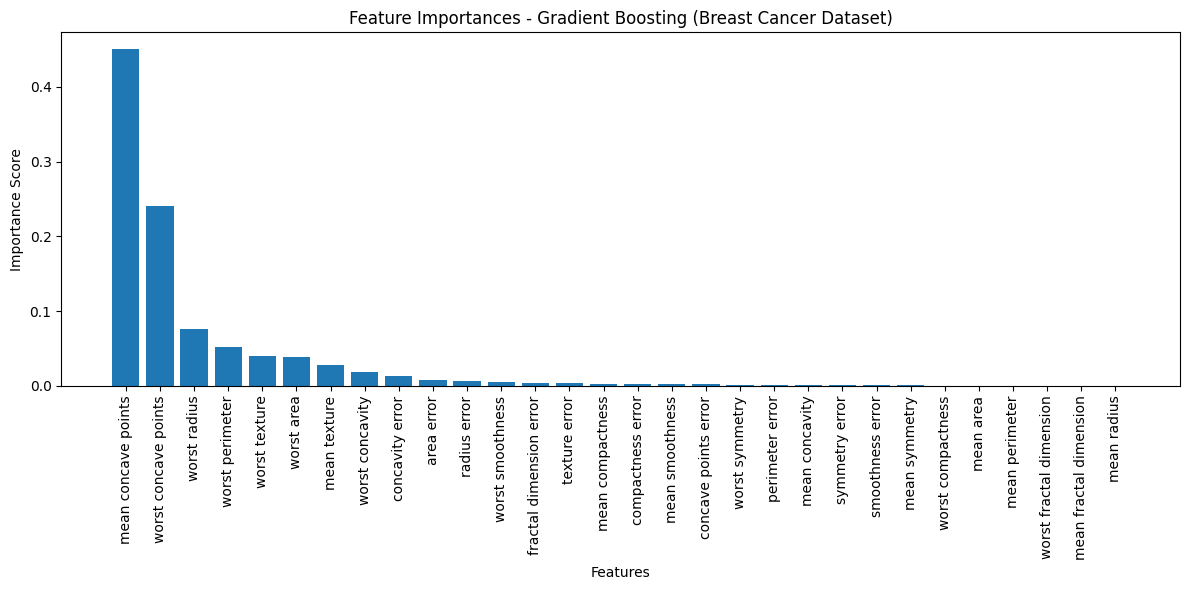

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
importances = model.feature_importances_
feature_names = data.feature_names

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances - Gradient Boosting (Breast Cancer Dataset)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
